#Vacunación contra el covid en Perú
El siguiente notebook realiza una exploración a los datos de vacunación contra el covid en Perú. Los datos fueron extraídos de https://www.datosabiertos.gob.pe/dataset/vacunaci%C3%B3n-contra-covid-19-ministerio-de-salud-minsa

 ![texto alternativo](https://drive.google.com/uc?export=view&id=1HcmJ-8VKiIvzJPECLE-5MIGaMqKZ1VLO)

**Descripción de los datos**

- FECHA_CORTE      = Fecha de corte de información
- UUID             = ID de la persona vacunada
- GRUPO_RIESGO     = Grupo de riesgo al que pertenece la persona vacunada
- EDAD             = Edad de la persona vacunada
- SEXO             = Sexo de la persona vacunada
- FECHA_VACUNACION 
- DOSIS            = Dosis aplicada (primera o segunda)
- FABRICANTE       = Fabricante de la vacuna (Sinopharm, pfizer, astrazeneca
- DIRESA           = Diresa del EESS donde se aplicó la vacuna
- DEPARTAMENTO     = Departamento del EESS donde se aplicó la vacuna
- PROVINCIA        = Provincia del EESS donde se aplicó la vacuna
- DISTRITO         = Distrito del EESS donde se aplicó la vacuna

EESS (Establecimiento de salud)

##**Análisis inicial**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/SergioGerman412/Grupo-de-Estudio/main/vacunas_covid2.csv")
data 

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210616,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210616,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210616,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
3,20210616,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
4,20210616,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210616,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,20210616,47af1f7bec9b74e500c5700d9c902c0e,ADULTO MAYOR,67.0,FEMENINO,20210615,2,PFIZER,LIMA CENTRO,LIMA,LIMA,LIMA
99995,20210616,a52f4d4f3f702d0b1bfb8b08e3eeb4c5,ADULTO MAYOR,64.0,MASCULINO,20210601,1,PFIZER,CALLAO,CALLAO,CALLAO,CARMEN DE LA LEGUA REYNOSO
99996,20210616,80a8ad735373b5f80e25837342a6fbc8,ADULTO MAYOR,68.0,MASCULINO,20210523,1,PFIZER,LIMA ESTE,LIMA,LIMA,LURIGANCHO (CHOSICA)
99997,20210616,80a8ad735373b5f80e25837342a6fbc8,ADULTO MAYOR,68.0,MASCULINO,20210613,2,PFIZER,LIMA ESTE,LIMA,LIMA,LURIGANCHO (CHOSICA)


**Análisis univariante**

In [ ]:
data["GRUPO_RIESGO"].value_counts()

ADULTO MAYOR                           83778
PERSONAL DE SALUD                      13860
POLICIA NACIONAL DEL PERU               1223
PERSONAL MILITAR Ó FF AA                 392
BRIGADISTAS                              301
TRABAJADOR Ó PERSONAL DE LIMPIEZA        174
BOMBERO                                  161
PERSONAL DE SEGURIDAD                     76
ESTUDIANTES DE CIENCIAS DE LA SALUD       34
Name: GRUPO_RIESGO, dtype: int64

In [ ]:
data["FABRICANTE"].value_counts()

PFIZER         87753
SINOPHARM       8907
ASTRAZENECA     3339
Name: FABRICANTE, dtype: int64

In [ ]:
data["DOSIS"].value_counts()

1    63843
2    36156
Name: DOSIS, dtype: int64



> **seguimos**







In [ ]:
#El método head() de pandas se usa para devolver n(5 por defecto) filas superiores de un marco de datos o una serie.
data.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210616,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210616,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210616,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
3,20210616,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
4,20210616,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210616,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA


In [ ]:
#El método tail() de pandas se usa para devolver n(5 por defecto) filas inferiores de un marco de datos o una serie.

data.tail()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
99994,20210616,47af1f7bec9b74e500c5700d9c902c0e,ADULTO MAYOR,67.0,FEMENINO,20210615,2,PFIZER,LIMA CENTRO,LIMA,LIMA,LIMA
99995,20210616,a52f4d4f3f702d0b1bfb8b08e3eeb4c5,ADULTO MAYOR,64.0,MASCULINO,20210601,1,PFIZER,CALLAO,CALLAO,CALLAO,CARMEN DE LA LEGUA REYNOSO
99996,20210616,80a8ad735373b5f80e25837342a6fbc8,ADULTO MAYOR,68.0,MASCULINO,20210523,1,PFIZER,LIMA ESTE,LIMA,LIMA,LURIGANCHO (CHOSICA)
99997,20210616,80a8ad735373b5f80e25837342a6fbc8,ADULTO MAYOR,68.0,MASCULINO,20210613,2,PFIZER,LIMA ESTE,LIMA,LIMA,LURIGANCHO (CHOSICA)
99998,20210616,1c4c59710741559405b0a4ef1abf392c,ADULTO MAYOR,62.0,FEMENINO,20210609,1,PFIZER,LIMA NORTE,LIMA,LIMA,SAN MARTIN DE PORRES




> **Observemos el nombre de las columnas de la data**



In [ ]:
data.columns

Index(['FECHA_CORTE', 'UUID', 'GRUPO_RIESGO', 'EDAD', 'SEXO',
       'FECHA_VACUNACION', 'DOSIS', 'FABRICANTE', 'DIRESA', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO'],
      dtype='object')

In [ ]:
data.describe()

,FECHA_CORTE,EDAD,FECHA_VACUNACION,DOSIS
count,99999.0,94618.000000,9.999900e+04,99999.000000
mean,20210616.0,69.217083,2.021050e+07,1.361564
std,0.0,9.401478,1.005052e+02,0.480456
min,20210616.0,39.000000,2.021021e+07,1.000000
25%,20210616.0,64.000000,2.021043e+07,1.000000
50%,20210616.0,69.000000,2.021052e+07,1.000000
75%,20210616.0,75.000000,2.021053e+07,2.000000
max,20210616.0,116.000000,2.021062e+07,2.000000


In [ ]:
data['FECHA_CORTE'].unique()

array([20210616])

*Interpretación Prioritaria*
- FECHA_CORTE posee el mismo valor para toda la tabla de datos (no hay varianza)


##**Filtros**



**filtro 1** - query

In [ ]:
#se utiliza para consultar las columnas de un DataFrame con una expresión booleana.

filtro1 = data.query("DOSIS==1 and GRUPO_RIESGO=='ESTUDIANTES DE CIENCIAS DE LA SALUD'")
filtro1.head(2)


,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
4136,20210616,b63b129d3a23221d427b9d8b2fffd8c1,ESTUDIANTES DE CIENCIAS DE LA SALUD,60.0,FEMENINO,20210602,1,PFIZER,LORETO,LORETO,MAYNAS,IQUITOS
9235,20210616,7ee6c804d684c6dec41601e088e8605b,ESTUDIANTES DE CIENCIAS DE LA SALUD,NaN,FEMENINO,20210504,1,PFIZER,LORETO,LORETO,MAYNAS,IQUITOS


In [ ]:
print('La cantidad de filas del filtro1 es:',len(filtro1.index))

La cantidad de filas del filtro1 es: 24


**filtro 2** - &

In [ ]:
#Si tenemos dos condiciones a cumplir, cada condición la ponemos dentro de paréntesis y las unimos usando un operador lógico '&'

filtro2 = data[(data.DOSIS == 2) & (data.FABRICANTE == 'ASTRAZENECA')]
filtro2.head(2)

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
4,20210616,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210616,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
6,20210616,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210609,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA


In [ ]:
print('La cantidad de filas del filtro2 es:',len(filtro2.axes[0]))

La cantidad de filas del filtro2 es: 1435


**filtro3** - isin

In [ ]:
#Isin nos permite comprobar si un valor está dentro de una lista. 

filtro3=data[data.GRUPO_RIESGO.isin(["BOMBERO","BRIGADISTAS"])]
filtro3.head(2)


,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
907,20210616,8eaa094a64608244cd40dd75a0530b8f,BRIGADISTAS,64.0,FEMENINO,20210528,1,PFIZER,LORETO,LORETO,MAYNAS,IQUITOS
1482,20210616,bcc967b1b209265b78ccb2e192d77e71,BRIGADISTAS,68.0,FEMENINO,20210410,1,PFIZER,LORETO,LORETO,MAYNAS,IQUITOS


In [ ]:
print('La cantidad de filas del filtro3 es:',filtro3.shape[0])

La cantidad de filas del filtro3 es: 462


##**conocer la cantidad de datos nulos y no nulos**

**datos no nulos**

In [ ]:
data.notnull().sum()

FECHA_CORTE         99999
UUID                99999
GRUPO_RIESGO        99999
EDAD                94618
SEXO                99999
FECHA_VACUNACION    99999
DOSIS               99999
FABRICANTE          99999
DIRESA              99999
DEPARTAMENTO        99999
PROVINCIA           99999
DISTRITO            99999
dtype: int64

**datos nulos**

In [ ]:
data.isna().sum()

FECHA_CORTE            0
UUID                   0
GRUPO_RIESGO           0
EDAD                5381
SEXO                   0
FECHA_VACUNACION       0
DOSIS                  0
FABRICANTE             0
DIRESA                 0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
dtype: int64

In [ ]:
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in data.loc[:, data.isna().any()].columns:                                     
  print('En la columna',col,'hay',data[col].isna().sum(),'valores nulos')

En la columna EDAD hay 5381 valores nulos


*filas con los datos nulos de edad*

In [ ]:
data.loc[data["EDAD"].isna()==True]

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210616,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210616,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210616,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
38,20210616,f1eb84ba12a3b093bf349fb8ceb87b86,PERSONAL MILITAR Ó FF AA,NaN,MASCULINO,20210226,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,JESUS MARIA
123,20210616,318d4b4ce6f5e4fae9569dc73ba2bcff,PERSONAL DE SALUD,NaN,FEMENINO,20210313,1,PFIZER,LIMA CENTRO,LIMA,LIMA,SAN JUAN DE LURIGANCHO
...,...,...,...,...,...,...,...,...,...,...,...,...
99967,20210616,39894dae81f11d018e4ab7b3a218dbe1,ADULTO MAYOR,NaN,MASCULINO,20210608,1,PFIZER,LIMA CENTRO,LIMA,LIMA,LIMA
99970,20210616,07800cef039936e11aa7c6dbe8f877e7,PERSONAL DE SALUD,NaN,MASCULINO,20210320,1,PFIZER,LIMA SUR,LIMA,LIMA,VILLA EL SALVADOR
99971,20210616,07800cef039936e11aa7c6dbe8f877e7,PERSONAL DE SALUD,NaN,MASCULINO,20210412,2,PFIZER,LIMA SUR,LIMA,LIMA,VILLA EL SALVADOR
99974,20210616,cbfbe171cf9346d95ebf82b244e04c60,PERSONAL DE SALUD,NaN,FEMENINO,20210318,1,PFIZER,LIMA SUR,LIMA,LIMA,VILLA EL SALVADOR


##**revisando la variable EDAD**

In [ ]:
 #estas columnas no ofrecen informacion que podamos explorar
data.drop(columns=["FECHA_CORTE", "UUID"], inplace=True)
data.head(2)

,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA


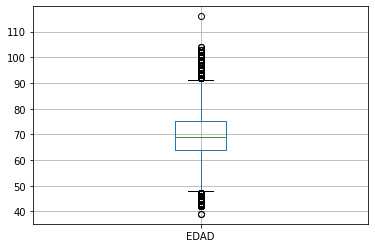

In [ ]:
data.boxplot(column="EDAD")

##**Inputación de datos**

 ![texto alternativo](https://drive.google.com/uc?export=view&id=11kzJTkkU02k8jHV1tpv-joVTVBfGunia)

###**eliminar**

In [ ]:
data1 = data.copy()

In [ ]:
data1.isna().sum()

GRUPO_RIESGO           0
EDAD                5381
SEXO                   0
FECHA_VACUNACION       0
DOSIS                  0
FABRICANTE             0
DIRESA                 0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
dtype: int64

In [ ]:
data_limpio = data1.dropna(axis=0)
data_limpio.head(2)

,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
3,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
4,ADULTO MAYOR,81.0,FEMENINO,20210616,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA


In [ ]:
data_limpio.isna().sum()

GRUPO_RIESGO        0
EDAD                0
SEXO                0
FECHA_VACUNACION    0
DOSIS               0
FABRICANTE          0
DIRESA              0
DEPARTAMENTO        0
PROVINCIA           0
DISTRITO            0
dtype: int64

*Posibles desventajas*

- la varianza varia drásticamente, regularmente, minimamente
- se pierden muestras

### **Moda**

*Observaciones*
- Usualmente la moda se usa para las variables categóricas
(En la estadística, la moda es el valor que aparece con mayor frecuencia en un conjunto de datos. )

- Ejm: 

In [ ]:
# Importar los datos desde el repositorio
dataset = pd.read_csv("https://raw.githubusercontent.com/SergioGerman412/Grupo-de-Estudio/main/customer.csv")
dataset.head(2)

,Unnamed: 0,ID,Genero,Casado,Age,Graduado,Profesion,Work_Experience,Spending_Score,Family_Size,Categoria_economica
0,1,462643,Femenino,Si,38,Si,Ingeniero,NaN,Promedio,3.0,A
1,2,466315,Femenino,Si,67,Si,Ingeniero,1.0,Bajo,1.0,B


In [ ]:
dataset2  = dataset.copy()

*conocer la moda*

In [ ]:
filtro_Profesion = dataset2["Profesion"]

In [ ]:
import statistics as stat
moda=stat.mode(filtro_Profesion)

print(moda)

Artista


In [ ]:
dataset2["Profesion"].value_counts()

Artista              1314
Entretenimiento       586
Ingeniero             448
Abogado               355
Doctor                342
Ejecutivo             308
Personal de salud     207
Homemaker             128
Marketing              87
Name: Profesion, dtype: int64

In [ ]:
dataset2["Profesion"].isna().sum()

55

*realizamos la inputación con la moda*

In [ ]:
filtro6 = dataset2["Profesion"].isna()
dataset2.loc[filtro6, "Profesion"] = moda

In [ ]:
dataset2["Profesion"].isna().sum()

0

In [ ]:
dataset2["Profesion"].value_counts()

Artista              1369
Entretenimiento       586
Ingeniero             448
Abogado               355
Doctor                342
Ejecutivo             308
Personal de salud     207
Homemaker             128
Marketing              87
Name: Profesion, dtype: int64

###**mediana**

En el ámbito de la estadística, la mediana representa el valor de la variable de posición central en un conjunto de dato

In [ ]:
data3 = data.copy()

In [ ]:
data3["EDAD"].unique()

array([ nan,  81.,  63.,  64.,  69.,  65.,  67.,  73.,  72.,  62.,  75.,
        82.,  86.,  76.,  61.,  78.,  71.,  88.,  68.,  77.,  74.,  85.,
        60.,  87.,  90.,  95.,  66.,  80.,  59.,  70.,  83.,  84.,  92.,
        79.,  58.,  56.,  93.,  55.,  91.,  89.,  54.,  94.,  57., 102.,
        96.,  99.,  98., 101.,  97., 103.,  46.,  43.,  42.,  45.,  44.,
        48.,  47.,  52., 104.,  51.,  50.,  53.,  49., 100.,  39., 116.])

In [ ]:
data3["EDAD"].describe()

count    94618.000000
mean        69.217083
std          9.401478
min         39.000000
25%         64.000000
50%         69.000000
75%         75.000000
max        116.000000
Name: EDAD, dtype: float64

In [ ]:
data3["EDAD"].value_counts()

66.0     4730
70.0     4494
68.0     4485
65.0     4476
67.0     4458
         ... 
102.0       6
103.0       6
104.0       2
39.0        2
116.0       1
Name: EDAD, Length: 65, dtype: int64

In [ ]:
data3["EDAD"].isna().sum()

5381

In [ ]:
mediana = data3["EDAD"].median()
mediana

69.0

In [ ]:
filtro_mediana = data3["EDAD"].isna()
data3.loc[filtro_mediana, "EDAD"] = mediana

In [ ]:
data3["EDAD"].isna().sum()

0

In [ ]:
data3["EDAD"].describe()

count    99999.000000
mean        69.205402
std          9.145160
min         39.000000
25%         64.000000
50%         69.000000
75%         75.000000
max        116.000000
Name: EDAD, dtype: float64

In [ ]:
data3["EDAD"].value_counts()

69.0     9584
66.0     4730
70.0     4494
68.0     4485
65.0     4476
         ... 
102.0       6
103.0       6
104.0       2
39.0        2
116.0       1
Name: EDAD, Length: 65, dtype: int64

###**media**




La media, también conocida como promedio, es el valor que se obtiene al dividir la suma de un conglomerado de números entre la cantidad de ellos.

- Sensible a outliers

In [ ]:
data4 = data.copy()

In [ ]:
data4["EDAD"].value_counts()

66.0     4730
70.0     4494
68.0     4485
65.0     4476
67.0     4458
         ... 
102.0       6
103.0       6
104.0       2
39.0        2
116.0       1
Name: EDAD, Length: 65, dtype: int64

In [ ]:
data4["EDAD"].isna().sum()

5381

In [ ]:
media = data4["EDAD"].mean()
media

69.21708343021412

In [ ]:
filtro_media = data4["EDAD"].isna()
data4.loc[filtro_media, "EDAD"] = media

In [ ]:
data4["EDAD"].isna().sum()

0

In [ ]:
data4["EDAD"].value_counts()

69.217083     5381
66.000000     4730
70.000000     4494
68.000000     4485
65.000000     4476
              ... 
103.000000       6
102.000000       6
104.000000       2
39.000000        2
116.000000       1
Name: EDAD, Length: 66, dtype: int64